In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as seabornInstance 
import sklearn
from sklearn import metrics
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#IMPORTING DATASET

In [24]:
df = pd.read_csv("train_test_pgd.csv")
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,539.900024,542.500000,535.700012,536.750000,531.990540,7642793
1,2020-01-02,536.000000,541.900024,535.849976,540.599976,535.806335,10264223
2,2020-01-03,538.000000,540.799988,536.250000,538.849976,534.071838,9594690
3,2020-01-06,537.250000,537.250000,523.799988,525.700012,521.038513,12534334
4,2020-01-07,531.299988,535.599976,521.650024,522.900024,518.263306,16101835
5,2020-01-08,516.000000,527.349976,515.000000,525.950012,521.286255,16094310
6,2020-01-09,530.700012,547.400024,530.299988,546.299988,541.455811,18934019
7,2020-01-10,544.900024,546.500000,538.500000,540.250000,535.459473,12335407
8,2020-01-13,539.400024,546.049988,538.000000,538.599976,533.824036,7901800
9,2020-01-14,536.200012,538.950012,534.150024,537.599976,532.832947,13939440


#Data Exploration

In [25]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,747.000000,747.000000,747.000000,747.000000,747.000000,7.470000e+02
mean,626.805153,634.338622,618.902810,626.736278,622.969711,2.209191e+07
std,180.136727,180.274105,180.384138,180.422942,180.891683,1.596127e+07
min,284.000000,297.899994,268.299988,284.000000,281.481689,3.149310e+06
25%,493.899994,502.899994,487.225006,497.449997,493.038986,1.109811e+07
50%,650.500000,655.000000,643.750000,650.299988,644.533630,1.654975e+07
75%,751.799988,759.774994,744.250000,752.750000,748.259705,2.768546e+07
max,956.000000,958.200012,941.000000,952.900024,952.900024,1.259394e+08


In [26]:
# Checking missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [27]:
df.shape

(747, 7)

In [28]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [29]:
# Date is an object hence converting it's type to datetime
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       747 non-null    datetime64[ns]
 1   Open       747 non-null    float64       
 2   High       747 non-null    float64       
 3   Low        747 non-null    float64       
 4   Close      747 non-null    float64       
 5   Adj Close  747 non-null    float64       
 6   Volume     747 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.0 KB


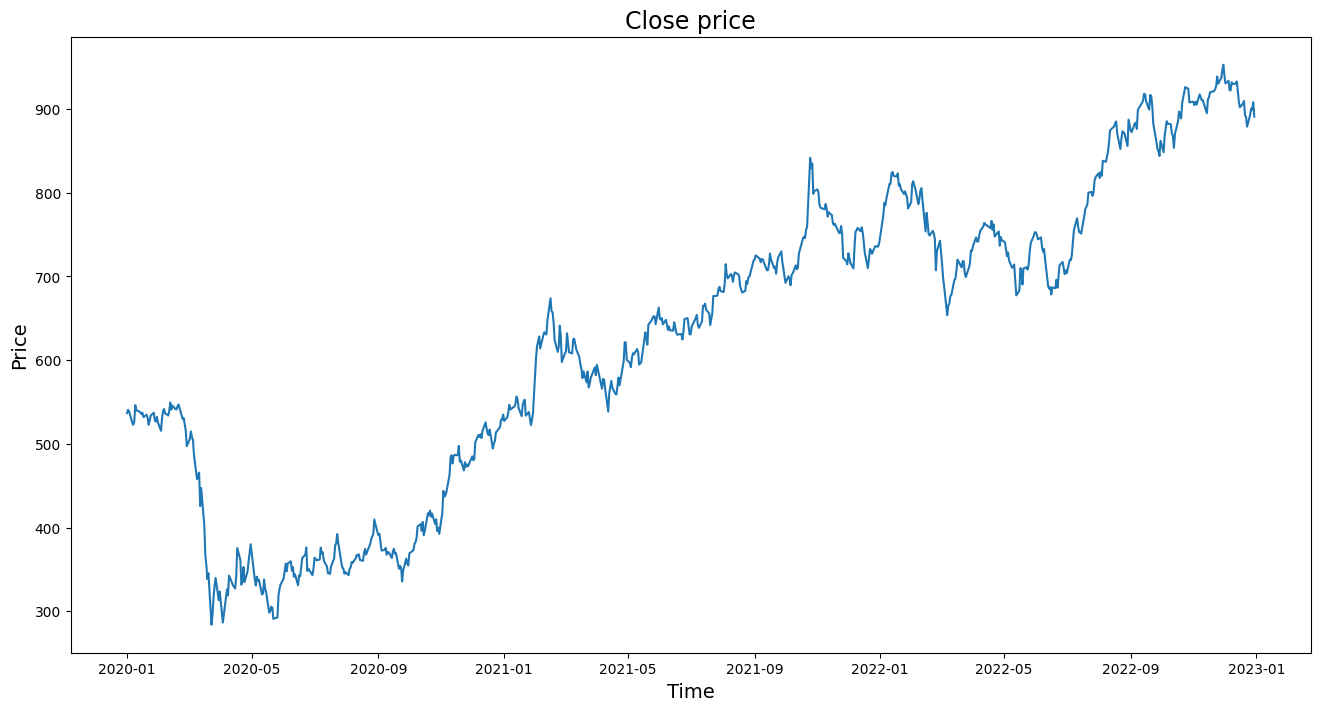

In [30]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'])
plt.title("Close price", fontsize=17)
plt.ylabel('Price', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.show()

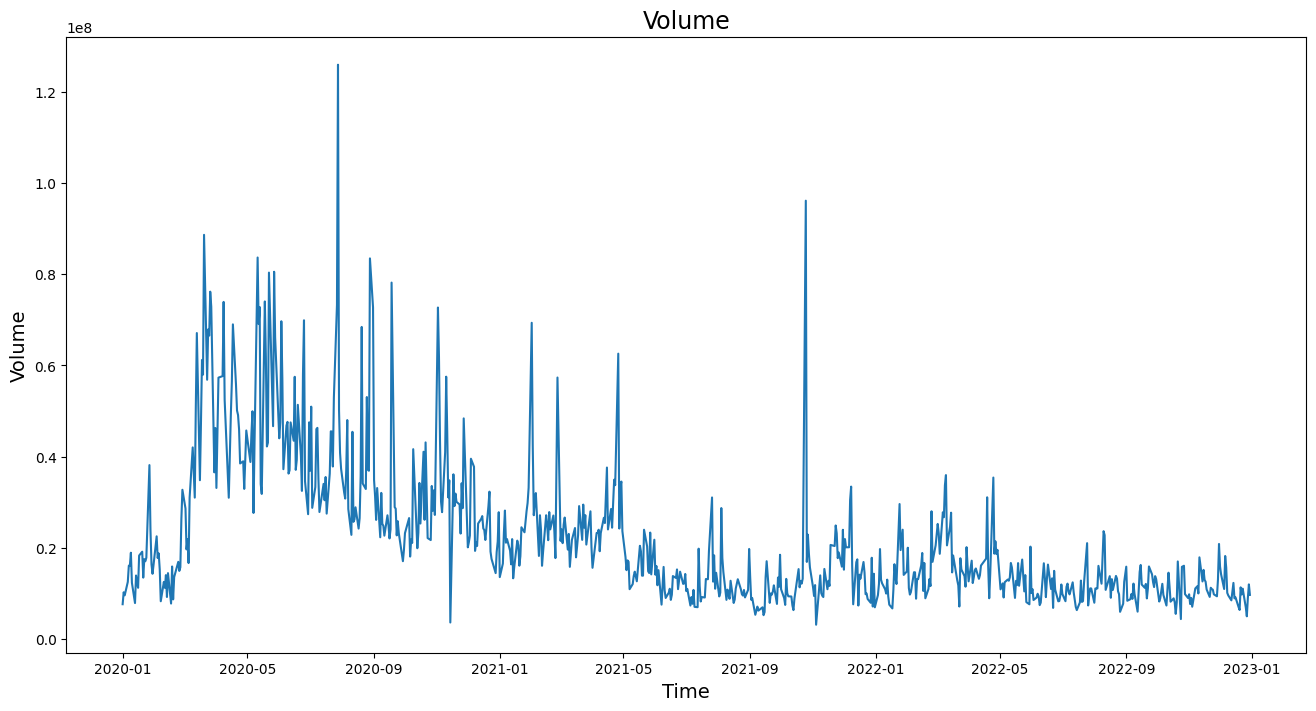

In [31]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Volume'])
plt.title("Volume", fontsize=17)
plt.ylabel('Volume', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.show()

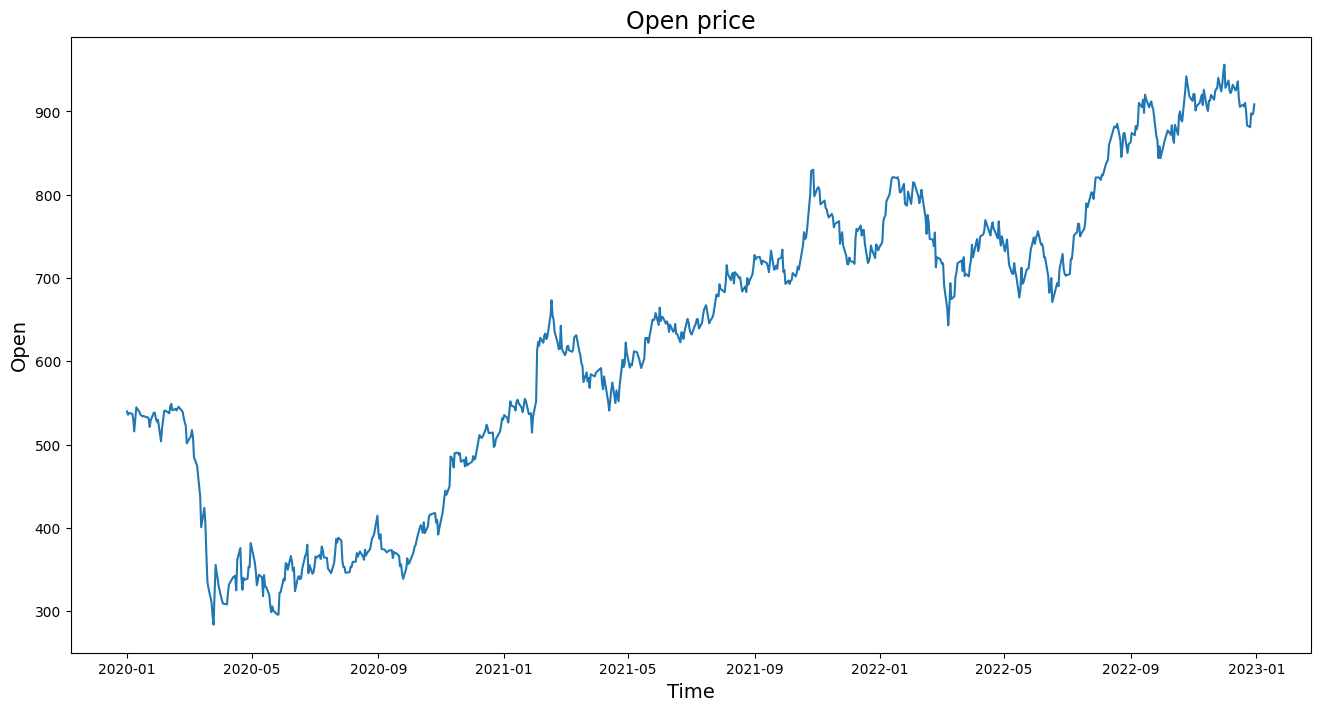

In [32]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Open'])
plt.title("Open price", fontsize=17)
plt.ylabel('Open', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.show()

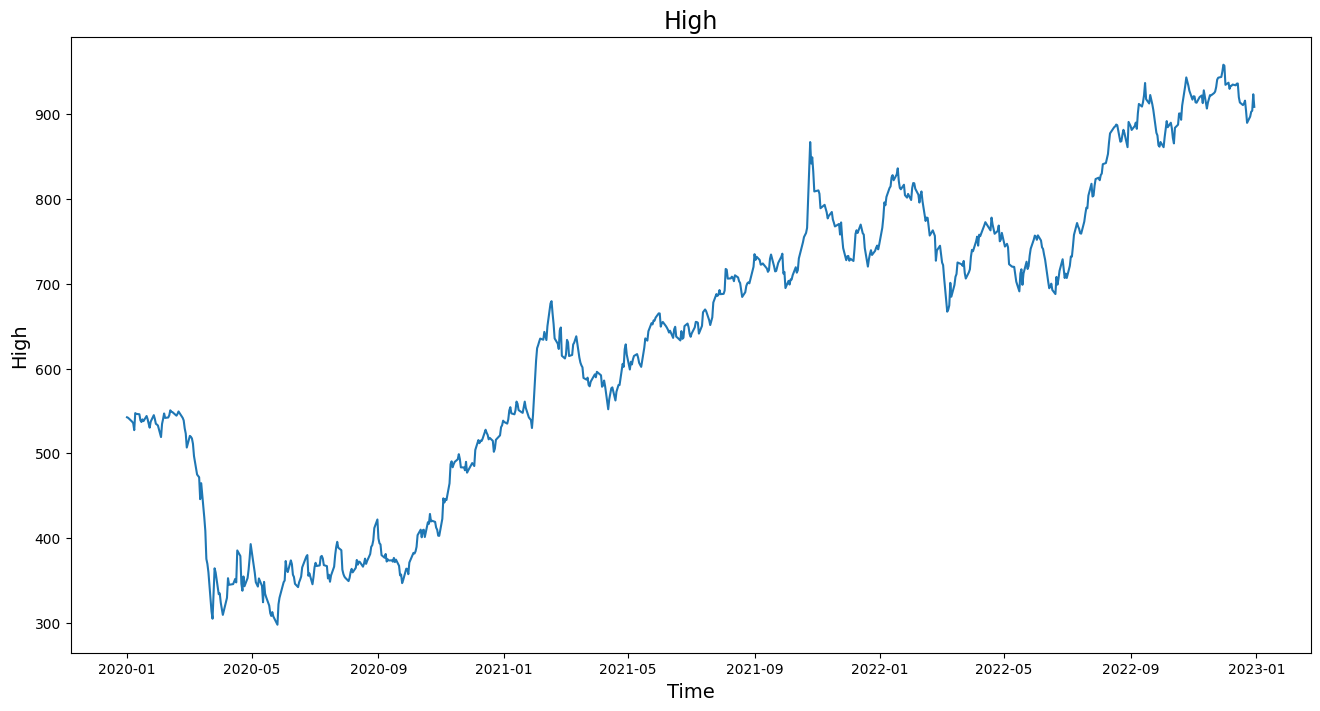

In [33]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['High'])
plt.title("High", fontsize=17)
plt.ylabel('High', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.show()

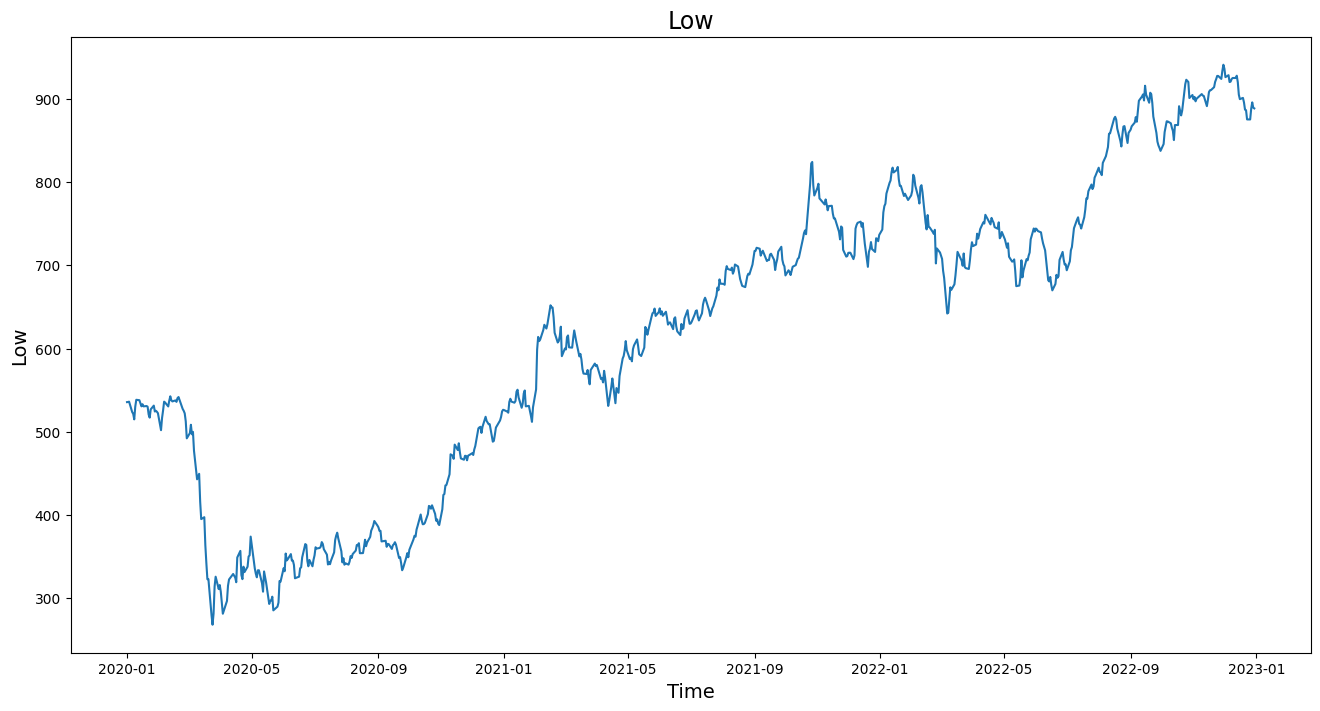

In [34]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Low'])
plt.title("Low", fontsize=17)
plt.ylabel('Low', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.show()

<ipython-input-35-b6f2f3870032>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-35-b6f2f3870032>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
<ipython-input-35-b6f2f3870032>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new

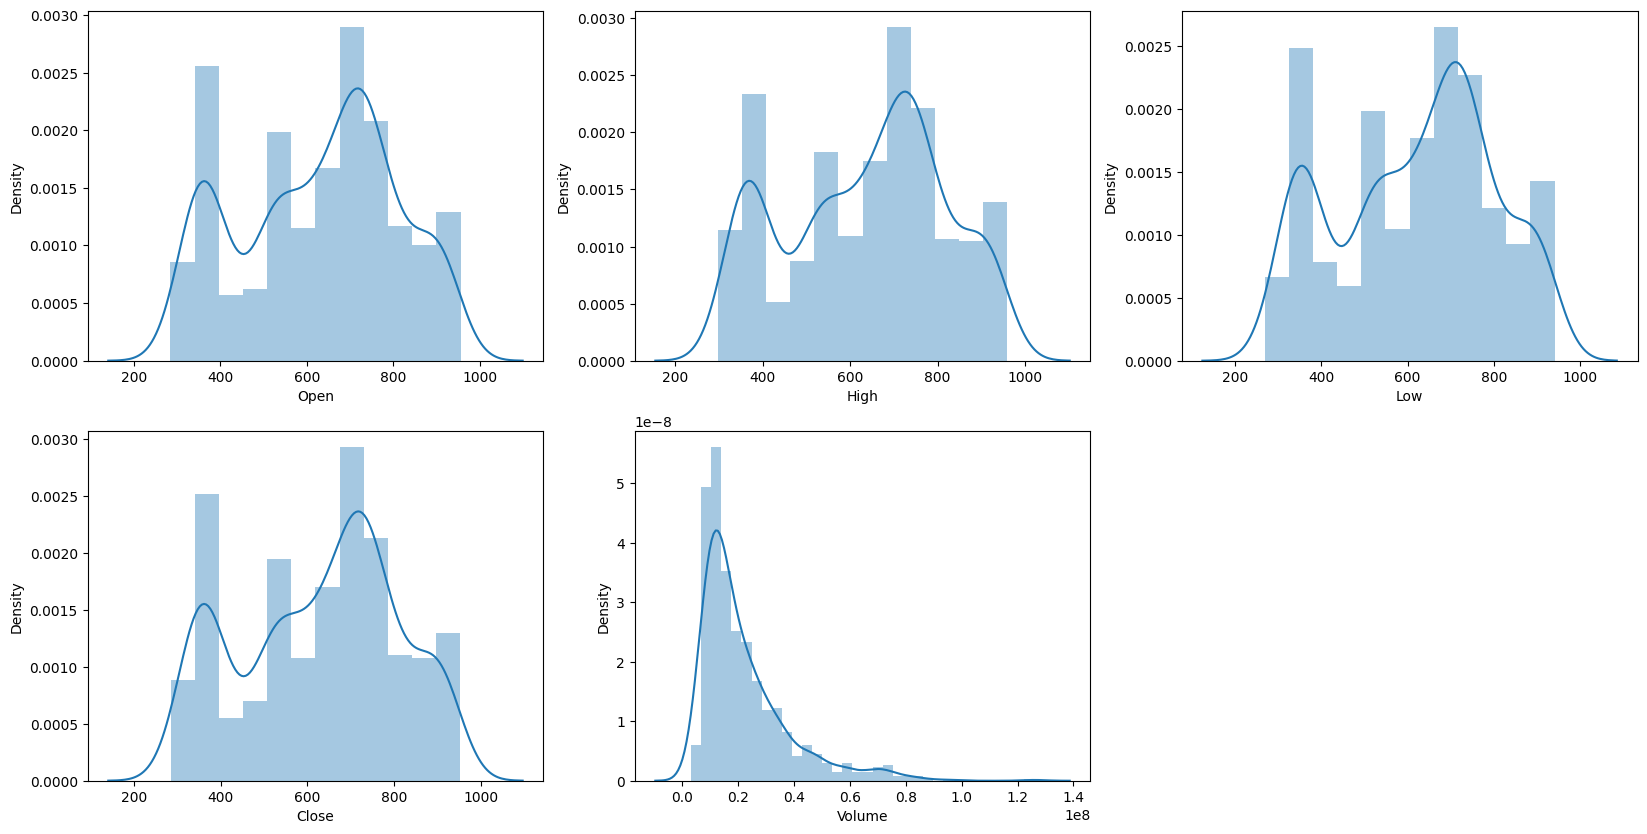

In [35]:
import matplotlib.pyplot as plt
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

<ipython-input-36-25cecc36263e>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


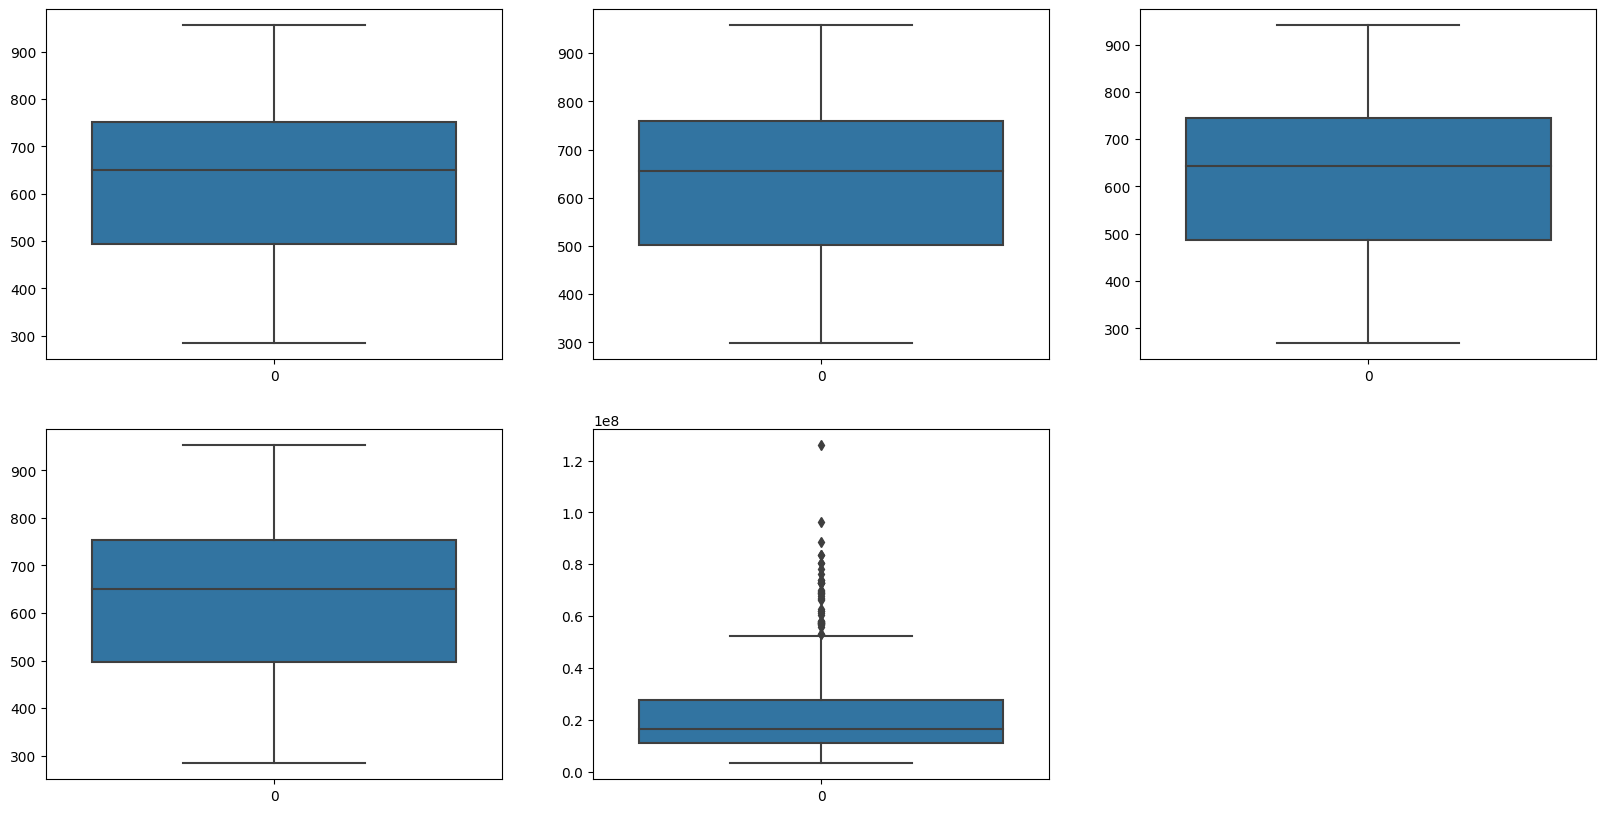

In [36]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [37]:
#Adding new variables

df['Avg'] = (df['Open'] + df['Close'])/2
df['Moving_avg'] = df['Close'].rolling(window=10,min_periods=0).mean()

In [38]:
#Taking Log of all variables

df["Log_Open"] = np.log(df['Open'])
df["Log_High"] = np.log(df['High'])
df["Log_Low"] = np.log(df['Low'])
df["Log_Close"] = np.log(df['Close'])
df["Log_Volume"] = np.log(df['Volume'])
df["Log_Avg"] = np.log(df['Avg'])
df["Log_Moving_Avg"] = np.log(df['Moving_avg'])

In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Avg,Moving_avg,Log_Open,Log_High,Log_Low,Log_Close,Log_Volume,Log_Avg,Log_Moving_Avg
count,747.000000,747.000000,747.000000,747.000000,747.000000,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,626.805153,634.338622,618.902810,626.736278,622.969711,2.209191e+07,626.770715,624.567037,6.393800,6.406990,6.379520,6.393452,16.707202,6.393673,6.390807
std,180.136727,180.274105,180.384138,180.422942,180.891683,1.596127e+07,180.210836,178.647717,0.317226,0.312573,0.323065,0.318174,0.618193,0.317509,0.314931
min,284.000000,297.899994,268.299988,284.000000,281.481689,3.149310e+06,294.375000,308.839999,5.648974,5.696758,5.592106,5.648974,14.962694,5.684854,5.732823
25%,493.899994,502.899994,487.225006,497.449997,493.038986,1.109811e+07,495.837494,491.827502,6.202309,6.220389,6.188724,6.209495,16.222285,6.206230,6.198122
50%,650.500000,655.000000,643.750000,650.299988,644.533630,1.654975e+07,650.775024,644.579999,6.477741,6.484635,6.467310,6.477434,16.621882,6.478164,6.468599
75%,751.799988,759.774994,744.250000,752.750000,748.259705,2.768546e+07,752.275009,746.562500,6.622470,6.633022,6.612377,6.623733,17.136417,6.623102,6.615479
max,956.000000,958.200012,941.000000,952.900024,952.900024,1.259394e+08,950.475006,936.175000,6.862758,6.865057,6.846943,6.859510,18.651311,6.856962,6.841802


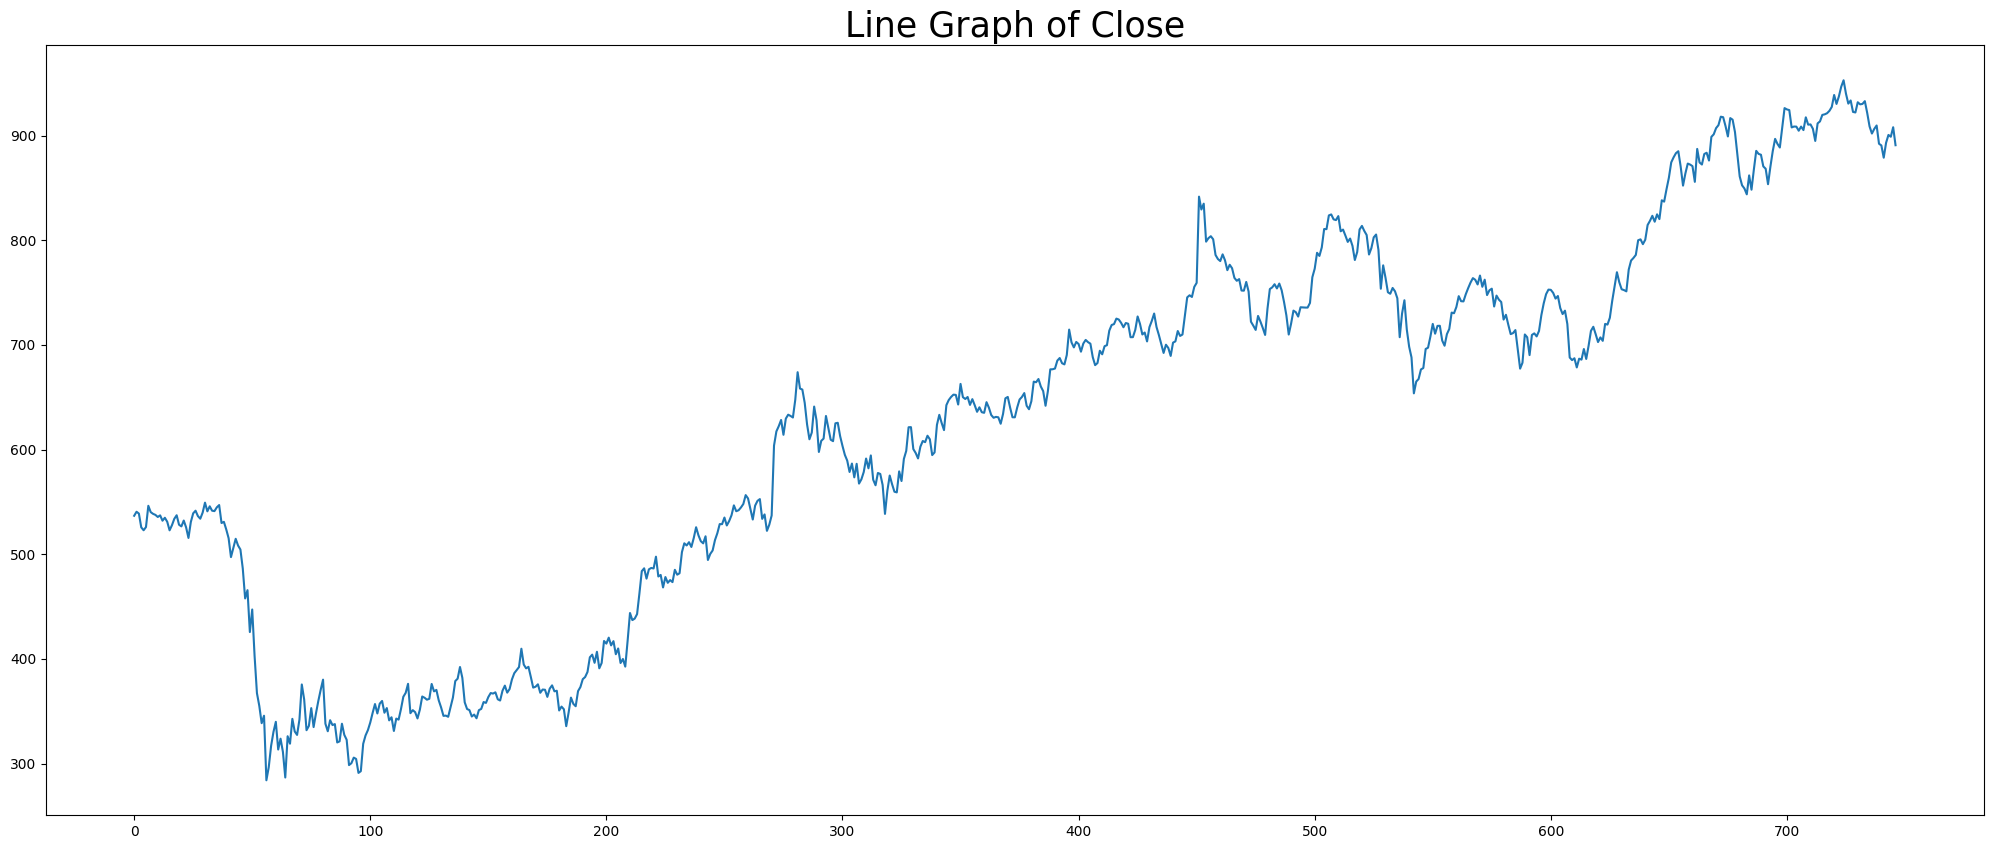

In [40]:
plt.figure(figsize = (25,10))
plt.plot(df['Close'])
plt.title("Line Graph of Close",fontsize = 25)
plt.show()

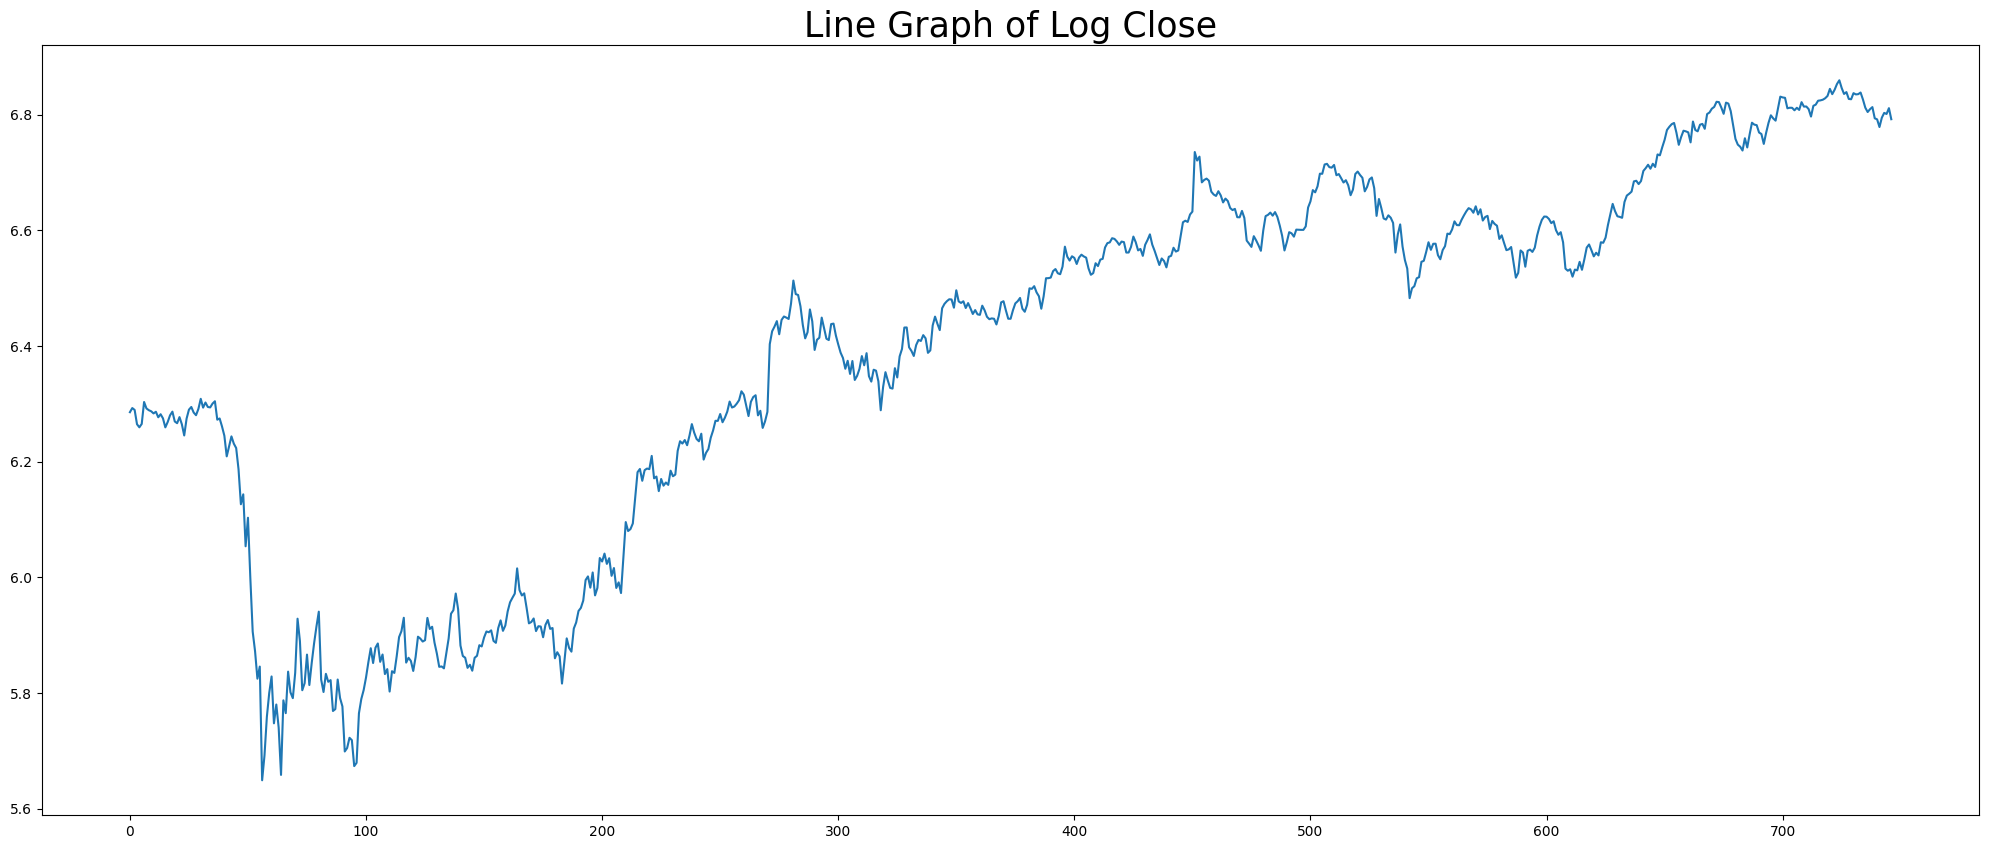

In [41]:
plt.figure(figsize = (25,10))
plt.plot(df['Log_Close'])
plt.title("Line Graph of Log Close",fontsize = 25)
plt.show()

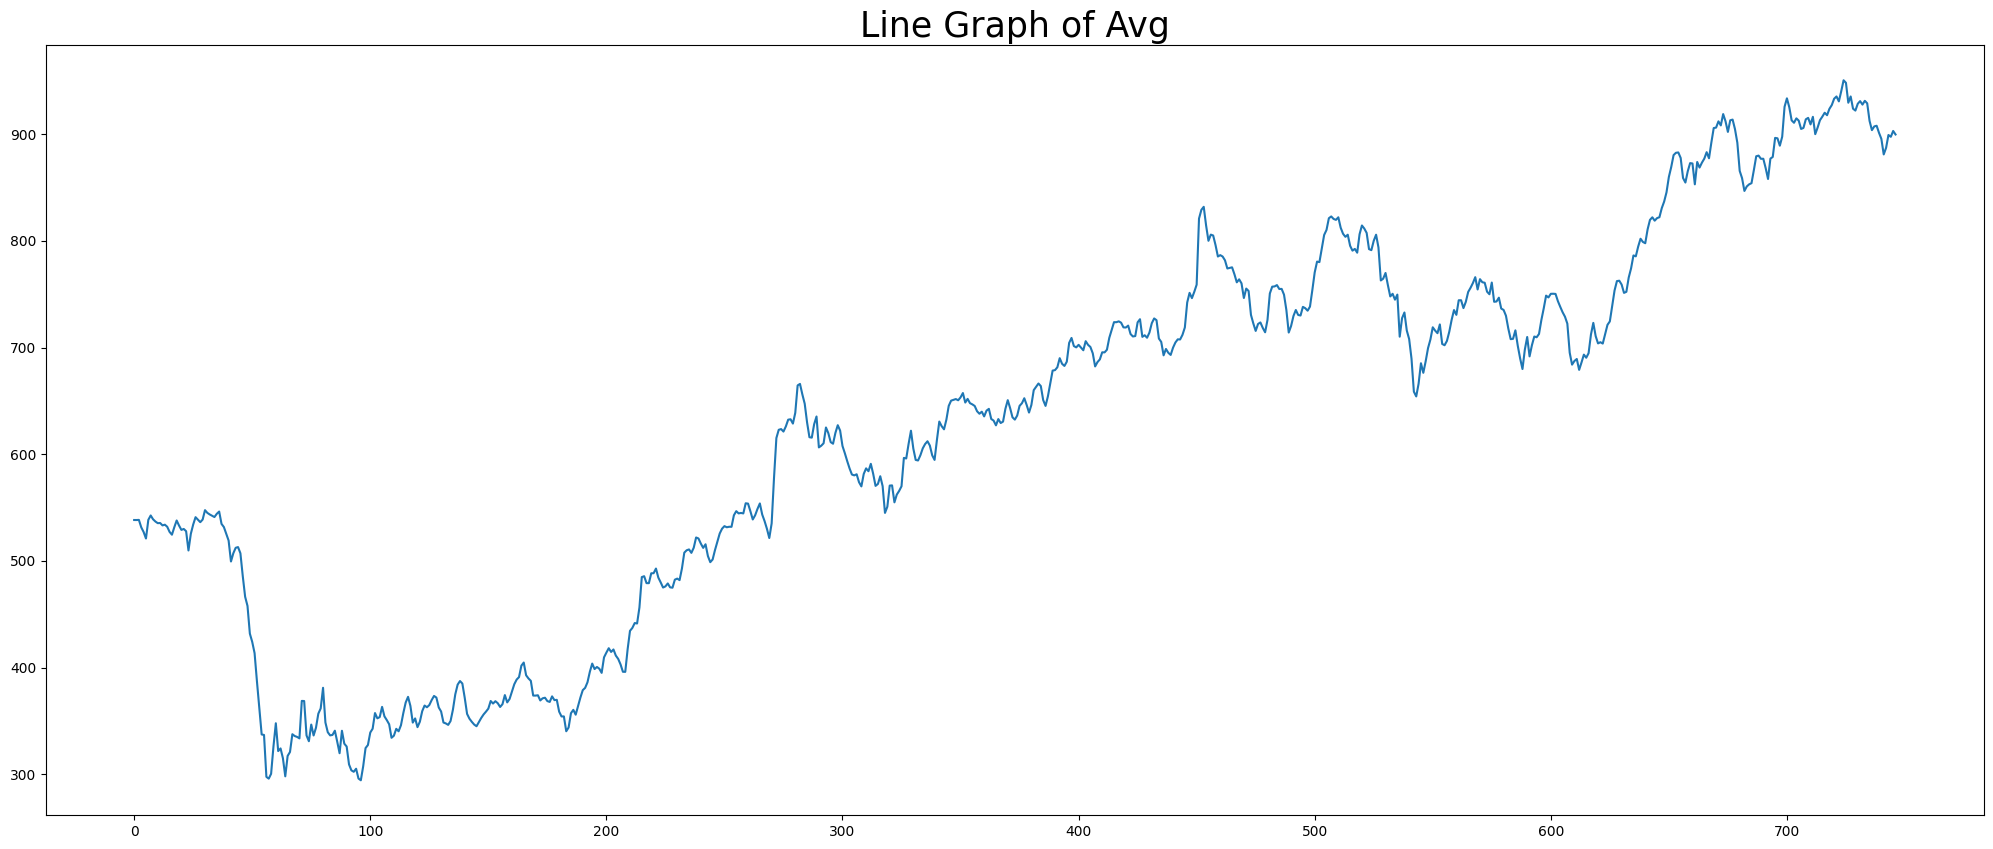

In [42]:
plt.figure(figsize = (25,10))
plt.plot(df['Avg'])
plt.title("Line Graph of Avg",fontsize = 25)
plt.show()

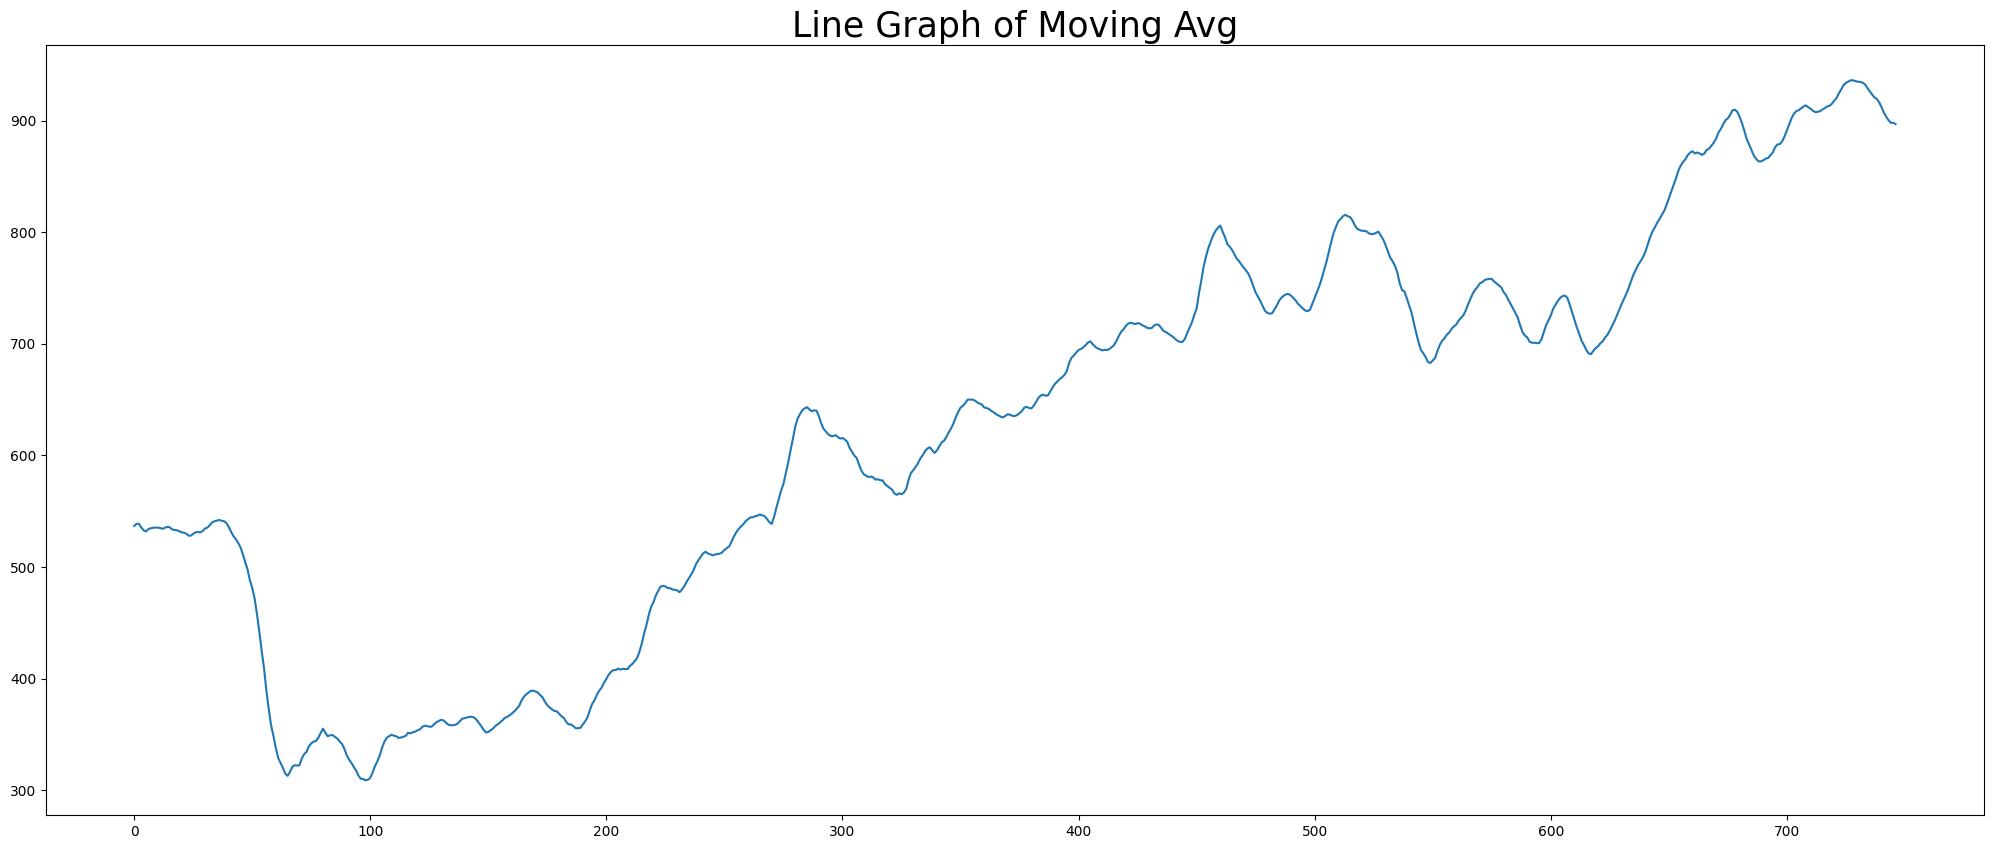

In [43]:
plt.figure(figsize = (25,10))
plt.plot(df['Moving_avg'])
plt.title("Line Graph of Moving Avg",fontsize = 25)
plt.show()

#Correlation

In [44]:
df.corr()

<ipython-input-44-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume,Avg,Moving_avg,Log_Open,Log_High,Log_Low,Log_Close,Log_Volume,Log_Avg,Log_Moving_Avg
Open,1.000000,0.999161,0.999326,0.998469,0.998459,-0.692278,0.999617,0.994348,0.989508,0.989416,0.987943,0.987574,-0.741774,0.989012,0.984359
High,0.999161,1.000000,0.999166,0.999417,0.999410,-0.681149,0.999672,0.994456,0.988233,0.989932,0.987327,0.988143,-0.732086,0.988667,0.984235
Low,0.999326,0.999166,1.000000,0.999387,0.999363,-0.698406,0.999739,0.993582,0.989166,0.989731,0.989046,0.988899,-0.747617,0.989501,0.983822
Close,0.998469,0.999417,0.999387,1.000000,0.999961,-0.689471,0.999618,0.993415,0.988193,0.989937,0.988300,0.989447,-0.739597,0.989295,0.983722
Adj Close,0.998459,0.999410,0.999363,0.999961,1.000000,-0.687620,0.999594,0.993498,0.987122,0.988884,0.987195,0.988345,-0.738313,0.988208,0.982748
Volume,-0.692278,-0.681149,-0.698406,-0.689471,-0.687620,1.000000,-0.691138,-0.688028,-0.726375,-0.713719,-0.734492,-0.723826,0.931402,-0.725342,-0.719476
Avg,0.999617,0.999672,0.999739,0.999618,0.999594,-0.691138,1.000000,0.994262,0.989229,0.990056,0.988500,0.988890,-0.740969,0.989532,0.984417
Moving_avg,0.994348,0.994456,0.993582,0.993415,0.993498,-0.688028,0.994262,1.000000,0.983172,0.984280,0.981337,0.981908,-0.737654,0.983018,0.989856
Log_Open,0.989508,0.988233,0.989166,0.988193,0.987122,-0.726375,0.989229,0.983172,1.000000,0.998912,0.999115,0.998121,-0.761100,0.999528,0.993066
Log_High,0.989416,0.989932,0.989731,0.989937,0.988884,-0.713719,0.990056,0.984280,0.998912,1.000000,0.998742,0.999178,-0.751364,0.999523,0.993592


<ipython-input-45-0a8208f0ed09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
<ipython-input-45-0a8208f0ed09>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths = 0.5,mask = mask,annot_kws={"size": 6})


<Axes: >

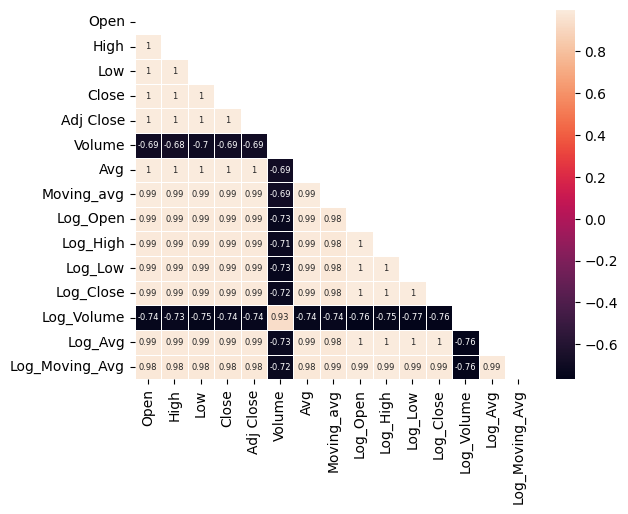

In [45]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True,linewidths = 0.5,mask = mask,annot_kws={"size": 6})

#Indexing

In [46]:
df = df.set_index('Date')

In [47]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Avg,Moving_avg,Log_Open,Log_High,Log_Low,Log_Close,Log_Volume,Log_Avg,Log_Moving_Avg
Date,,,,,,,,,,,,,,,
2020-01-01,539.900024,542.500000,535.700012,536.750000,531.990540,7642793,538.325012,536.750000,6.291384,6.296188,6.283574,6.285532,15.849274,6.288462,6.285532
2020-01-02,536.000000,541.900024,535.849976,540.599976,535.806335,10264223,538.299988,538.674988,6.284134,6.295082,6.283854,6.292680,16.144175,6.288416,6.289112
2020-01-03,538.000000,540.799988,536.250000,538.849976,534.071838,9594690,538.424988,538.733317,6.287859,6.293050,6.284600,6.289437,16.076720,6.288648,6.289221
2020-01-06,537.250000,537.250000,523.799988,525.700012,521.038513,12534334,531.475006,535.474991,6.286464,6.286464,6.261110,6.264731,16.343982,6.275656,6.283154
2020-01-07,531.299988,535.599976,521.650024,522.900024,518.263306,16101835,527.100006,532.959998,6.275327,6.283388,6.256997,6.259390,16.594444,6.267390,6.278446


# Forecasting next day price

In [48]:
df['Close_Forecast']=df['Close'].shift(-1)
df['Log_CF'] = np.log(df['Close_Forecast'])

In [49]:
df = df[:-1]

In [50]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Avg,Moving_avg,Log_Open,Log_High,Log_Low,Log_Close,Log_Volume,Log_Avg,Log_Moving_Avg,Close_Forecast,Log_CF
count,746.000000,746.000000,746.000000,746.000000,746.000000,7.460000e+02,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,626.427546,633.971114,618.541353,626.382238,622.610623,2.210854e+07,626.404892,624.201892,6.393240,6.406447,6.378971,6.392917,16.708034,6.393126,6.390260,626.856903,6.393596
std,179.961498,180.114820,180.234251,180.284150,180.746430,1.596550e+07,180.053977,178.488414,0.317069,0.312431,0.322932,0.318052,0.618189,0.317369,0.314787,180.513847,0.318363
min,284.000000,297.899994,268.299988,284.000000,281.481689,3.149310e+06,294.375000,308.839999,5.648974,5.696758,5.592106,5.648974,14.962694,5.684854,5.732823,284.000000,5.648974
25%,492.199997,502.349991,486.737503,497.349998,492.939873,1.110186e+07,494.356247,490.971252,6.198867,6.219295,6.187723,6.209294,16.222623,6.203243,6.196381,497.349998,6.209294
50%,650.299988,654.950012,643.524994,650.299988,644.533630,1.658614e+07,650.712509,644.529996,6.477434,6.484559,6.466961,6.477434,16.624075,6.478068,6.468521,650.299988,6.477434
75%,751.237488,759.687500,744.200012,752.587524,748.098206,2.770002e+07,752.218758,746.250002,6.621722,6.632907,6.612310,6.623517,17.136943,6.623027,6.615061,752.799988,6.623800
max,956.000000,958.200012,941.000000,952.900024,952.900024,1.259394e+08,950.475006,936.175000,6.862758,6.865057,6.846943,6.859510,18.651311,6.856962,6.841802,952.900024,6.859510


Iteration 1

In [51]:
df['H-L'] = df['High'] - df['Low']

In [52]:
df

,Open,High,Low,Close,Adj Close,Volume,Avg,Moving_avg,Log_Open,Log_High,Log_Low,Log_Close,Log_Volume,Log_Avg,Log_Moving_Avg,Close_Forecast,Log_CF,H-L
Date,,,,,,,,,,,,,,,,,,
2020-01-01,539.900024,542.500000,535.700012,536.750000,531.990540,7642793,538.325012,536.750000,6.291384,6.296188,6.283574,6.285532,15.849274,6.288462,6.285532,540.599976,6.292680,6.799988
2020-01-02,536.000000,541.900024,535.849976,540.599976,535.806335,10264223,538.299988,538.674988,6.284134,6.295082,6.283854,6.292680,16.144175,6.288416,6.289112,538.849976,6.289437,6.050049
2020-01-03,538.000000,540.799988,536.250000,538.849976,534.071838,9594690,538.424988,538.733317,6.287859,6.293050,6.284600,6.289437,16.076720,6.288648,6.289221,525.700012,6.264731,4.549988
2020-01-06,537.250000,537.250000,523.799988,525.700012,521.038513,12534334,531.475006,535.474991,6.286464,6.286464,6.261110,6.264731,16.343982,6.275656,6.283154,522.900024,6.259390,13.450012
2020-01-07,531.299988,535.599976,521.650024,522.900024,518.263306,16101835,527.100006,532.959998,6.275327,6.283388,6.256997,6.259390,16.594444,6.267390,6.278446,525.950012,6.265206,13.949951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,883.049988,889.650024,875.299988,878.900024,878.900024,11059215,880.975006,907.375006,6.783382,6.790828,6.774567,6.778671,16.218775,6.781029,6.810556,893.200012,6.794811,14.350037
2022-12-26,881.099976,897.000000,875.250000,893.200012,893.200012,6943159,887.149994,903.665009,6.781171,6.799056,6.774510,6.794811,15.753267,6.788014,6.806459,900.650024,6.803117,21.750000
2022-12-27,897.700012,902.750000,888.200012,900.650024,900.650024,4994381,899.175018,900.435010,6.799836,6.805446,6.789197,6.803117,15.423824,6.801478,6.802878,898.950012,6.801227,14.549988


In [53]:
# cant do close-open as there is no column of close in the validation file
df["Close_Forecast"] = pd.to_numeric(df.Close_Forecast)

In [54]:
df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
Adj Close         float64
Volume              int64
Avg               float64
Moving_avg        float64
Log_Open          float64
Log_High          float64
Log_Low           float64
Log_Close         float64
Log_Volume        float64
Log_Avg           float64
Log_Moving_Avg    float64
Close_Forecast    float64
Log_CF            float64
H-L               float64
dtype: object

In [55]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Avg,Moving_avg,Log_Open,Log_High,Log_Low,Log_Close,Log_Volume,Log_Avg,Log_Moving_Avg,Close_Forecast,Log_CF,H-L
Open,1.000000,0.999160,0.999327,0.998471,0.998459,-0.692064,0.999617,0.994331,0.989520,0.989435,0.987969,0.987605,-0.741385,0.989034,0.984364,0.996309,0.985257,-0.020277
High,0.999160,1.000000,0.999164,0.999417,0.999410,-0.680896,0.999671,0.994439,0.988229,0.989939,0.987337,0.988160,-0.731668,0.988674,0.984226,0.997105,0.985621,0.004250
Low,0.999327,0.999164,1.000000,0.999386,0.999361,-0.698177,0.999739,0.993563,0.989159,0.989731,0.989052,0.988910,-0.747229,0.989503,0.983806,0.997303,0.986626,-0.036645
Close,0.998471,0.999417,0.999386,1.000000,0.999961,-0.689215,0.999618,0.993398,0.988177,0.989930,0.988296,0.989451,-0.739188,0.989289,0.983699,0.997716,0.986925,-0.015426
Adj Close,0.998459,0.999410,0.999361,0.999961,1.000000,-0.687366,0.999593,0.993480,0.987106,0.988879,0.987192,0.988350,-0.737903,0.988203,0.982726,0.997689,0.985841,-0.015006
Volume,-0.692064,-0.680896,-0.698177,-0.689215,-0.687366,1.000000,-0.690902,-0.687790,-0.726141,-0.713461,-0.734260,-0.723575,0.931363,-0.725099,-0.719227,-0.691170,-0.725935,0.433639
Avg,0.999617,0.999671,0.999739,0.999618,0.999593,-0.690902,1.000000,0.994244,0.989226,0.990061,0.988510,0.988907,-0.740569,0.989540,0.984407,0.997394,0.986469,-0.017856
Moving_avg,0.994331,0.994439,0.993563,0.993398,0.993480,-0.687790,0.994244,1.000000,0.983155,0.984273,0.981332,0.981911,-0.737249,0.983011,0.989864,0.991005,0.979301,0.005316
Log_Open,0.989520,0.988229,0.989159,0.988177,0.987106,-0.726141,0.989226,0.983155,1.000000,0.998910,0.999115,0.998119,-0.760725,0.999528,0.993050,0.986063,0.995500,-0.038745
Log_High,0.989435,0.989939,0.989731,0.989930,0.988879,-0.713461,0.990061,0.984273,0.998910,1.000000,0.998740,0.999177,-0.750972,0.999522,0.993578,0.987638,0.996318,-0.010949


In [56]:
df1 = df.drop(['Adj Close','Volume','Close'],axis =1)

In [57]:
df1

,Open,High,Low,Avg,Moving_avg,Log_Open,Log_High,Log_Low,Log_Close,Log_Volume,Log_Avg,Log_Moving_Avg,Close_Forecast,Log_CF,H-L
Date,,,,,,,,,,,,,,,
2020-01-01,539.900024,542.500000,535.700012,538.325012,536.750000,6.291384,6.296188,6.283574,6.285532,15.849274,6.288462,6.285532,540.599976,6.292680,6.799988
2020-01-02,536.000000,541.900024,535.849976,538.299988,538.674988,6.284134,6.295082,6.283854,6.292680,16.144175,6.288416,6.289112,538.849976,6.289437,6.050049
2020-01-03,538.000000,540.799988,536.250000,538.424988,538.733317,6.287859,6.293050,6.284600,6.289437,16.076720,6.288648,6.289221,525.700012,6.264731,4.549988
2020-01-06,537.250000,537.250000,523.799988,531.475006,535.474991,6.286464,6.286464,6.261110,6.264731,16.343982,6.275656,6.283154,522.900024,6.259390,13.450012
2020-01-07,531.299988,535.599976,521.650024,527.100006,532.959998,6.275327,6.283388,6.256997,6.259390,16.594444,6.267390,6.278446,525.950012,6.265206,13.949951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,883.049988,889.650024,875.299988,880.975006,907.375006,6.783382,6.790828,6.774567,6.778671,16.218775,6.781029,6.810556,893.200012,6.794811,14.350037
2022-12-26,881.099976,897.000000,875.250000,887.149994,903.665009,6.781171,6.799056,6.774510,6.794811,15.753267,6.788014,6.806459,900.650024,6.803117,21.750000
2022-12-27,897.700012,902.750000,888.200012,899.175018,900.435010,6.799836,6.805446,6.789197,6.803117,15.423824,6.801478,6.802878,898.950012,6.801227,14.549988


In [58]:
x = df.loc[:,['Open', 'High', 'Low', 'H-L']]
y = df.loc[:,["Close_Forecast"]]

In [59]:
x_train = x[:523]
x_test =x[523:747] #70%
y_train = y[:523]
y_test =y[523:747]

In [60]:
import numpy as np
import matplotlib.pyplot as plt
  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [61]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [62]:
print(model.intercept_)
print(model.coef_)

[2.93391591]
[[-5.20964152e-01 -1.55451316e+10  1.55451316e+10  1.55451316e+10]]


In [63]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9929763996918293
0.9809935589014906


In [64]:
y_pred = model.predict(x_test)

In [65]:
df_pred=pd.DataFrame(y_test.values,columns=['Actual'], index=y_test.index)
df_pred

,Actual
Date,
2022-02-07,792.500000
2022-02-08,802.799988
2022-02-09,805.500000
2022-02-10,790.799988
2022-02-11,753.700012
...,...
2022-12-23,893.200012
2022-12-26,900.650024
2022-12-27,898.950012


In [66]:
df_pred['Predicted'] = y_pred

<Axes: xlabel='Date'>

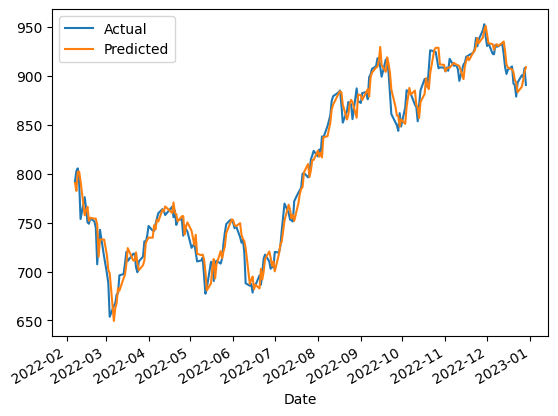

In [67]:
df_pred[['Actual','Predicted']].plot()

In [68]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 9.211704415825864
Mean Squared Error: 143.1640535459512
Root Mean Squared Error: 11.965118200249892




*   Iteration 2



In [69]:
df = df.drop(['Open','High','Low','Close','Adj Close'],axis =1)
df

,Volume,Avg,Moving_avg,Log_Open,Log_High,Log_Low,Log_Close,Log_Volume,Log_Avg,Log_Moving_Avg,Close_Forecast,Log_CF,H-L
Date,,,,,,,,,,,,,
2020-01-01,7642793,538.325012,536.750000,6.291384,6.296188,6.283574,6.285532,15.849274,6.288462,6.285532,540.599976,6.292680,6.799988
2020-01-02,10264223,538.299988,538.674988,6.284134,6.295082,6.283854,6.292680,16.144175,6.288416,6.289112,538.849976,6.289437,6.050049
2020-01-03,9594690,538.424988,538.733317,6.287859,6.293050,6.284600,6.289437,16.076720,6.288648,6.289221,525.700012,6.264731,4.549988
2020-01-06,12534334,531.475006,535.474991,6.286464,6.286464,6.261110,6.264731,16.343982,6.275656,6.283154,522.900024,6.259390,13.450012
2020-01-07,16101835,527.100006,532.959998,6.275327,6.283388,6.256997,6.259390,16.594444,6.267390,6.278446,525.950012,6.265206,13.949951
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,11059215,880.975006,907.375006,6.783382,6.790828,6.774567,6.778671,16.218775,6.781029,6.810556,893.200012,6.794811,14.350037
2022-12-26,6943159,887.149994,903.665009,6.781171,6.799056,6.774510,6.794811,15.753267,6.788014,6.806459,900.650024,6.803117,21.750000
2022-12-27,4994381,899.175018,900.435010,6.799836,6.805446,6.789197,6.803117,15.423824,6.801478,6.802878,898.950012,6.801227,14.549988


In [70]:
X1 = df['Log_Avg'].values.reshape(-1,1)
Y1 = df['Log_CF'].values.reshape(-1,1)

In [71]:
X1.shape , Y1.shape

((746, 1), (746, 1))

In [72]:
#Splitting data into Train & Test
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X1,Y1,test_size=(1/6),random_state=0)

In [73]:
X_train1.shape , Y_train1.shape

((621, 1), (621, 1))

In [74]:
#Using Linear Regression

regressor1 = LinearRegression()
regressor1.fit(X_train1,Y_train1) 

LinearRegression()

In [75]:
print(regressor1.intercept_)

[0.00416159]


In [76]:
print(regressor1.coef_)

[[0.99957594]]


In [77]:
print(regressor1.score(X_train1,Y_train1))
print(regressor1.score(X_test1,Y_test1))

0.9937743754132533
0.9921591308350554


In [78]:
Y_pred1 = regressor1.predict(X_test1)

In [79]:
dataset1 = pd.DataFrame({"Actual":Y_test1.flatten(),"Predicted":Y_pred1.flatten()})
dataset1.head(10)

,Actual,Predicted
0,6.782815,6.780356
1,6.686672,6.693066
2,6.259295,6.278143
3,6.302253,6.302275
4,5.907403,5.926506
5,5.940566,5.892548
6,6.408693,6.407500
7,5.813683,5.849853
8,6.812125,6.835238
9,6.280302,6.290653


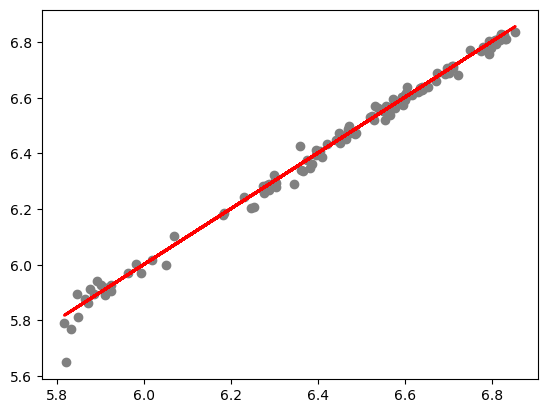

In [80]:
plt.scatter(X_test1,Y_test1,color="gray")
plt.plot(X_test1,Y_pred1,color="red",linewidth=2)
plt.show()

In [81]:
print("Mean Absolute Error:",metrics.mean_absolute_error(Y_test1,Y_pred1))
print("Mean Squared Error:",metrics.mean_squared_error(Y_test1,Y_pred1))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(Y_test1,Y_pred1)))

Mean Absolute Error: 0.01711965810886071
Mean Squared Error: 0.0006845246525655191
Root Mean Squared Error: 0.026163422034694146


In [82]:
regressor1.score(X_test1,Y_test1)

0.9921591308350554



*   Iteration 3


In [83]:
X=df.iloc[:,[3,4,5,7,8,9]]
Y=df['Log_CF'].values.reshape(-1,1)

In [84]:
X.head()

,Log_Open,Log_High,Log_Low,Log_Volume,Log_Avg,Log_Moving_Avg
Date,,,,,,
2020-01-01,6.291384,6.296188,6.283574,15.849274,6.288462,6.285532
2020-01-02,6.284134,6.295082,6.283854,16.144175,6.288416,6.289112
2020-01-03,6.287859,6.293050,6.284600,16.076720,6.288648,6.289221
2020-01-06,6.286464,6.286464,6.261110,16.343982,6.275656,6.283154
2020-01-07,6.275327,6.283388,6.256997,16.594444,6.267390,6.278446


In [85]:
X.shape , Y.shape

((746, 6), (746, 1))

In [86]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=(1/6),random_state=0)

In [87]:
X_train.shape , Y_train.shape

((621, 6), (621, 1))

In [88]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [89]:
print(regressor.intercept_)

[0.05092244]


In [90]:
print(regressor.coef_)

[[-1.02900531e+00  2.27677539e-01  2.55522500e-01 -1.03836330e-03
   1.49061286e+00  5.02947703e-02]]


In [91]:
print(regressor.score(X_train,Y_train))
print(regressor.score(X_test,Y_test))

0.9948062765584443
0.9903523844443513


In [92]:
Y_pred=regressor.predict(X_test)

In [93]:
dataset=pd.DataFrame({"Actual":Y_test.flatten(),"Predicted":Y_pred.flatten()})
dataset.head(10)

,Actual,Predicted
0,6.782815,6.787743
1,6.686672,6.679180
2,6.259295,6.280952
3,6.302253,6.294131
4,5.907403,5.926400
5,5.940566,5.920342
6,6.408693,6.411830
7,5.813683,5.869379
8,6.812125,6.825948
9,6.280302,6.287352


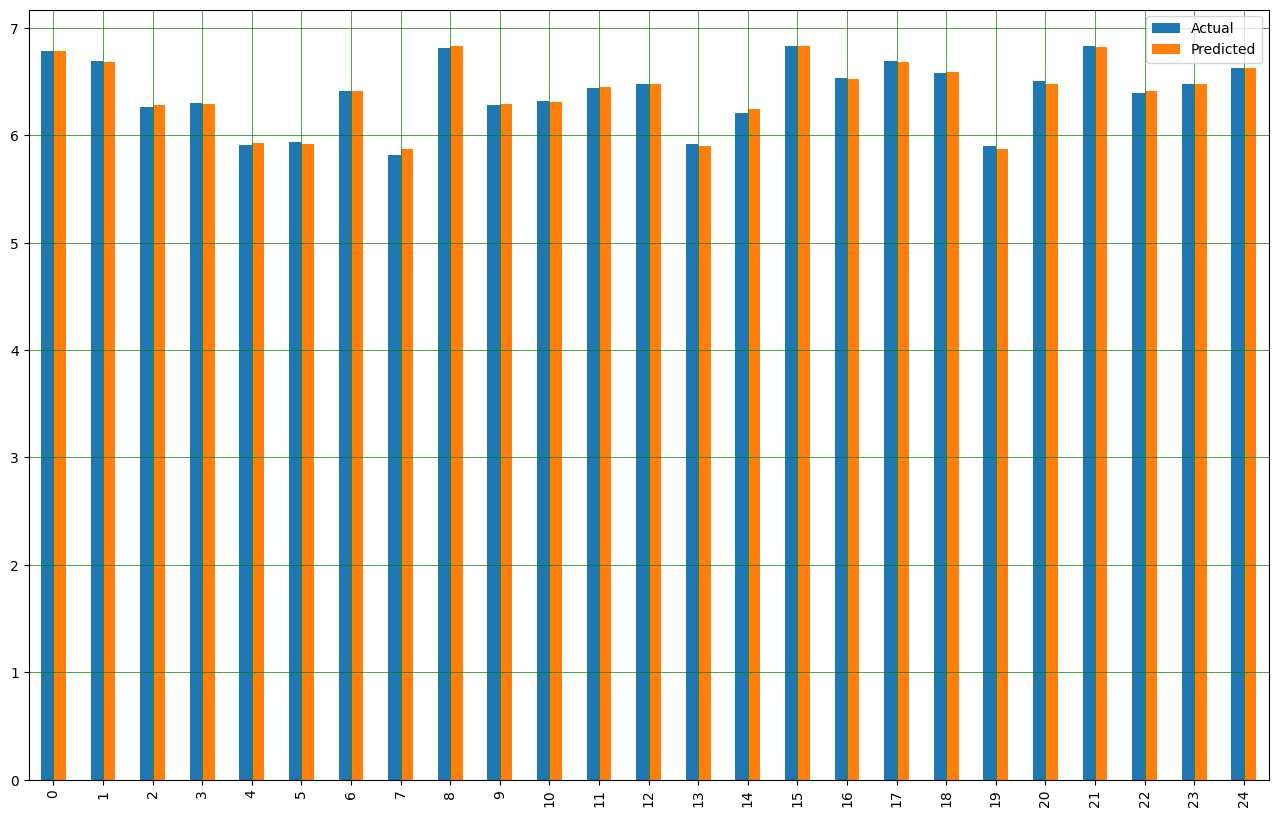

In [94]:
dataset_1=dataset.head(25)
dataset_1.plot(kind="bar",figsize=(16,10))
plt.grid(which="major",linestyle="-",linewidth="0.5",color="green")
plt.grid(which="minor",linestyle=":",linewidth="0.5",color="black")
plt.show()

In [95]:
print("Mean Absolute Error:",metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error: 0.01640306475070111
Mean Squared Error: 0.0008422574777604763
Root Mean Squared Error: 0.0290216725527747




*   Iteration 4



In [96]:
x=df.iloc[:,[3,4,5,7]]
y=df['Log_CF'].values.reshape(-1,1)

In [97]:
x.head()

,Log_Open,Log_High,Log_Low,Log_Volume
Date,,,,
2020-01-01,6.291384,6.296188,6.283574,15.849274
2020-01-02,6.284134,6.295082,6.283854,16.144175
2020-01-03,6.287859,6.293050,6.284600,16.076720
2020-01-06,6.286464,6.286464,6.261110,16.343982
2020-01-07,6.275327,6.283388,6.256997,16.594444


In [98]:
x.shape , y.shape

((746, 4), (746, 1))

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(1/6),random_state=0)

In [100]:
x_train.shape , y_train.shape

((621, 4), (621, 1))

In [101]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [102]:
print(regressor.intercept_)

[0.07568957]


In [103]:
print(regressor.coef_)

[[-0.62500528  0.79655673  0.82173495 -0.00181307]]


In [104]:
print(regressor.score(x_train,y_train))
print(regressor.score(x_test,y_test))

0.9944450809144945
0.9904201390153174


In [105]:
y_pred=regressor.predict(x_test)

In [106]:
dataset_3=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_pred.flatten()})
dataset_3.head(10)

,Actual,Predicted
0,6.782815,6.789483
1,6.686672,6.673279
2,6.259295,6.288787
3,6.302253,6.295729
4,5.907403,5.924620
5,5.940566,5.919255
6,6.408693,6.409831
7,5.813683,5.862146
8,6.812125,6.827646
9,6.280302,6.290200


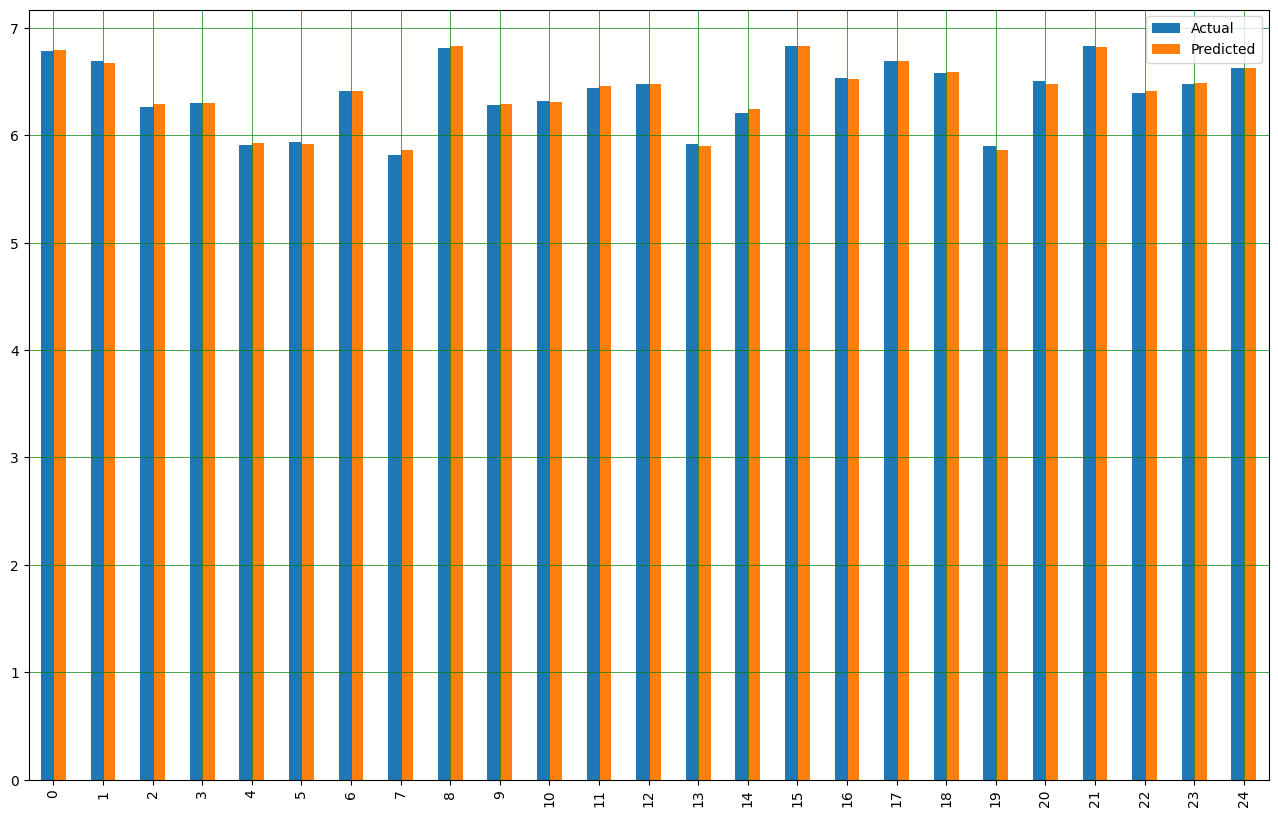

In [107]:
dataset_4=dataset_3.head(25)
dataset_4.plot(kind="bar",figsize=(16,10))
plt.grid(which="major",linestyle="-",linewidth="0.5",color="green")
plt.grid(which="minor",linestyle=":",linewidth="0.5",color="black")
plt.show()

In [108]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.017477170027702188
Mean Squared Error: 0.0008363423587635003
Root Mean Squared Error: 0.0289195843463128


#Ridge

In [109]:
#Iteration 3
ridgeR = Ridge()
ridgeR.fit(X_train, Y_train)
ridgeR_y_pred = ridgeR.predict(X_test)
print('Ridge Mean Square Error:',metrics.mean_squared_error(Y_test,ridgeR_y_pred))
print('Ridge Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(Y_test,ridgeR_y_pred)))

Ridge Mean Square Error: 0.0008186457801252346
Ridge Root Mean Square Error: 0.028611986651143863


In [110]:
# Iteration 4
ridgeR = Ridge()
ridgeR.fit(x_train, y_train)
ridgeR_y_pred_1 = ridgeR.predict(x_test)
print('Ridge Mean Square Error:',metrics.mean_squared_error(y_test,ridgeR_y_pred_1))
print('Ridge Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test,ridgeR_y_pred_1)))

Ridge Mean Square Error: 0.0007314649413900855
Ridge Root Mean Square Error: 0.027045608541685386


#Lasso

In [111]:
#Iteration 3
Lasso = Lasso(alpha=0.1)
Lasso.fit(X_train, Y_train)
Lasso_y_pred = Lasso.predict(X_test)
print('Lasso Mean Square Error:',metrics.mean_squared_error(Y_test,Lasso_y_pred))
print('Lasso Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(Y_test,Lasso_y_pred)))

Lasso Mean Square Error: 0.06313566021746744
Lasso Root Mean Square Error: 0.25126810425811597


In [112]:
# Iteration 4
Lasso.fit(x_train, y_train)
Lasso_y_pred_1 = Lasso.predict(x_test)
print('Lasso Mean Square Error:',metrics.mean_squared_error(y_test,Lasso_y_pred_1))
print('Lasso Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test,Lasso_y_pred_1)))

Lasso Mean Square Error: 0.06313566021746744
Lasso Root Mean Square Error: 0.25126810425811597


In [ ]:
X_test , x_test

(            Log_Open  Log_High   Log_Low  Log_Volume   Log_Avg  Log_Moving_Avg
 Date                                                                          
 2022-10-06  6.771993  6.793130  6.771993   16.310095  6.779069        6.763434
 2022-01-24  6.700731  6.705272  6.663516   17.203701  6.691743        6.702366
 2020-01-21  6.278428  6.292032  6.273254   16.416569  6.276643        6.284022
 2020-02-13  6.308098  6.308098  6.287859   16.037670  6.300786        6.282855
 2020-08-19  5.924256  5.929190  5.914583   17.393186  5.924857        5.899377
 ...              ...       ...       ...         ...       ...             ...
 2020-07-01  5.870003  5.901950  5.862494   17.424335  5.883740        5.876699
 2021-12-30  6.597555  6.607326  6.591674   16.477599  6.599190        6.592085
 2020-10-09  5.967940  6.000176  5.958166   17.544602  5.981667        5.918356
 2021-11-15  6.655440  6.665110  6.648401   16.207441  6.653057        6.664645
 2020-02-24  6.290643  6.294989  6.26824

#Elastic

In [113]:
#iteration 3
elastic = ElasticNet(alpha=0.1)
elastic.fit(X_train, Y_train)
elastic_y_pred = elastic.predict(X_test)
print('ElasticNet Mean Square Error:',metrics.mean_squared_error(Y_test,elastic_y_pred))
print('ElasticNet Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(Y_test,elastic_y_pred)))

ElasticNet Mean Square Error: 0.03085389430872103
ElasticNet Root Mean Square Error: 0.17565276629965448


In [114]:
#Iteration 4
elastic = ElasticNet(alpha=0.1)
elastic.fit(x_train, y_train)
elastic_y_pred_1 = elastic.predict(x_test)
print('ElasticNet Mean Square Error:',metrics.mean_squared_error(y_test,elastic_y_pred_1))
print('ElasticNet Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test,elastic_y_pred_1)))

ElasticNet Mean Square Error: 0.03262754647796022
ElasticNet Root Mean Square Error: 0.18063096766047682


#FINAL MODEL



*   Ridge has the least MSE and RMSE





In [115]:
ridgeR = Ridge()
ridgeR.fit(x_train, y_train)
ridgeR_y_prediction = ridgeR.predict(x_test)

In [116]:
final_data=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":ridgeR_y_prediction.flatten()})

In [117]:
final_data

,Actual,Predicted
0,6.782815,6.777869
1,6.686672,6.682997
2,6.259295,6.286642
3,6.302253,6.308098
4,5.907403,5.927077
...,...,...
120,5.893990,5.883696
121,6.606853,6.598946
122,6.001539,5.978686
123,6.638633,6.657199


In [118]:
final_data['Invlog_Actual'] = np.exp(final_data['Actual'])
final_data['Invlog_Predicted'] = np.exp(final_data['Predicted'])
final_data

,Actual,Predicted,Invlog_Actual,Invlog_Predicted
0,6.782815,6.777869,882.549988,878.194984
1,6.686672,6.682997,801.650024,798.709463
2,6.259295,6.286642,522.849976,537.346077
3,6.302253,6.308098,545.799988,548.999733
4,5.907403,5.927077,367.750000,375.056612
...,...,...,...,...
120,5.893990,5.883696,362.850006,359.134044
121,6.606853,6.598946,740.150024,734.320691
122,6.001539,5.978686,404.049988,394.921010
123,6.638633,6.657199,764.049988,778.367763


In [119]:
final_data = final_data.drop(['Actual',	'Predicted'],axis =1)
final_data

,Invlog_Actual,Invlog_Predicted
0,882.549988,878.194984
1,801.650024,798.709463
2,522.849976,537.346077
3,545.799988,548.999733
4,367.750000,375.056612
...,...,...
120,362.850006,359.134044
121,740.150024,734.320691
122,404.049988,394.921010
123,764.049988,778.367763


In [120]:
final_data.to_csv("predicted value.csv")

#Validation

In [121]:
val = pd.read_csv("validation_pgd.csv")
val.head()

,Date,Open,High,Low,Adj Close,Volume
0,2023-01-02,894.000000,907.000000,894.000000,902.450012,4315403
1,2023-01-03,898.500000,905.950012,896.750000,901.349976,5846855
2,2023-01-04,899.000000,907.900024,894.799988,899.099976,12454582
3,2023-01-05,900.900024,903.000000,872.000000,879.150024,16547196
4,2023-01-06,878.950012,878.950012,860.500000,870.099976,14804613


In [122]:
val.dtypes

Date          object
Open         float64
High         float64
Low          float64
Adj Close    float64
Volume         int64
dtype: object

In [123]:
val['Date']= pd.to_datetime(val['Date'])
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       20 non-null     datetime64[ns]
 1   Open       20 non-null     float64       
 2   High       20 non-null     float64       
 3   Low        20 non-null     float64       
 4   Adj Close  20 non-null     float64       
 5   Volume     20 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.1 KB


In [124]:
val["Log_Open"] = np.log(val['Open'])
val["Log_High"] = np.log(val['High'])
val["Log_Low"] = np.log(val['Low'])
val["Log_Volume"] = np.log(val['Volume'])

In [125]:
val = val.shift(+1)
val

,Date,Open,High,Low,Adj Close,Volume,Log_Open,Log_High,Log_Low,Log_Volume
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-02,894.000000,907.000000,894.000000,902.450012,4315403.0,6.795706,6.810142,6.795706,15.277701
2,2023-01-03,898.500000,905.950012,896.750000,901.349976,5846855.0,6.800727,6.808984,6.798777,15.581414
3,2023-01-04,899.000000,907.900024,894.799988,899.099976,12454582.0,6.801283,6.811134,6.796600,16.337599
4,2023-01-05,900.900024,903.000000,872.000000,879.150024,16547196.0,6.803394,6.805723,6.770789,16.621727
5,2023-01-06,878.950012,878.950012,860.500000,870.099976,14804613.0,6.778728,6.778728,6.757514,16.510449
6,2023-01-09,874.250000,878.750000,862.299988,873.349976,16811853.0,6.773366,6.778500,6.759603,16.637595
7,2023-01-10,875.400024,878.400024,856.599976,861.349976,13470142.0,6.774681,6.778102,6.752971,16.415986
8,2023-01-11,862.900024,870.849976,854.849976,866.299988,15558460.0,6.760299,6.769470,6.750926,16.560115
9,2023-01-12,865.500000,869.349976,854.950012,860.650024,16659001.0,6.763307,6.767746,6.751043,16.628461


In [126]:
val=val.tail(-1)
val

,Date,Open,High,Low,Adj Close,Volume,Log_Open,Log_High,Log_Low,Log_Volume
1,2023-01-02,894.000000,907.000000,894.000000,902.450012,4315403.0,6.795706,6.810142,6.795706,15.277701
2,2023-01-03,898.500000,905.950012,896.750000,901.349976,5846855.0,6.800727,6.808984,6.798777,15.581414
3,2023-01-04,899.000000,907.900024,894.799988,899.099976,12454582.0,6.801283,6.811134,6.796600,16.337599
4,2023-01-05,900.900024,903.000000,872.000000,879.150024,16547196.0,6.803394,6.805723,6.770789,16.621727
5,2023-01-06,878.950012,878.950012,860.500000,870.099976,14804613.0,6.778728,6.778728,6.757514,16.510449
6,2023-01-09,874.250000,878.750000,862.299988,873.349976,16811853.0,6.773366,6.778500,6.759603,16.637595
7,2023-01-10,875.400024,878.400024,856.599976,861.349976,13470142.0,6.774681,6.778102,6.752971,16.415986
8,2023-01-11,862.900024,870.849976,854.849976,866.299988,15558460.0,6.760299,6.769470,6.750926,16.560115
9,2023-01-12,865.500000,869.349976,854.950012,860.650024,16659001.0,6.763307,6.767746,6.751043,16.628461
10,2023-01-13,864.700012,874.900024,858.299988,873.450012,11223103.0,6.762383,6.774110,6.754954,16.233485


In [127]:
val=val.set_index('Date')

In [128]:
#Iteration 4 variables using ridge as it gives the least errors 
val = val.drop(['Adj Close','Volume','Open','High','Low','Adj Close'],axis =1)
val

,Log_Open,Log_High,Log_Low,Log_Volume
Date,,,,
2023-01-02,6.795706,6.810142,6.795706,15.277701
2023-01-03,6.800727,6.808984,6.798777,15.581414
2023-01-04,6.801283,6.811134,6.796600,16.337599
2023-01-05,6.803394,6.805723,6.770789,16.621727
2023-01-06,6.778728,6.778728,6.757514,16.510449
2023-01-09,6.773366,6.778500,6.759603,16.637595
2023-01-10,6.774681,6.778102,6.752971,16.415986
2023-01-11,6.760299,6.769470,6.750926,16.560115
2023-01-12,6.763307,6.767746,6.751043,16.628461


In [129]:
ridgeR_y_val = ridgeR.predict(val)

In [130]:
ridgeR_y_val

array([[6.80534786],
       [6.80552575],
       [6.80091497],
       [6.78862021],
       [6.76827049],
       [6.76664926],
       [6.76590037],
       [6.75724668],
       [6.7570906 ],
       [6.76293692],
       [6.77097658],
       [6.76004056],
       [6.7617872 ],
       [6.76702103],
       [6.77141233],
       [6.77183422],
       [6.77405744],
       [6.76035645],
       [6.71437096]])

In [131]:
Val_pred =pd.DataFrame({"Predicted":ridgeR_y_val.flatten()})
Val_pred

,Predicted
0,6.805348
1,6.805526
2,6.800915
3,6.788620
4,6.768270
5,6.766649
6,6.765900
7,6.757247
8,6.757091
9,6.762937


In [132]:
Val_pred['Predicted'] = np.exp(Val_pred['Predicted'])
Val_pred

,Predicted
0,902.661716
1,902.822301
2,898.669175
3,887.687893
4,869.806252
5,868.397239
6,867.747150
7,860.270336
8,860.136070
9,865.179432


In [133]:
Val_pred.to_csv("Validate.csv")